In [2]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# Read dataset to a dataframe
df = pd.read_csv('Kidney Patients Data.csv',encoding='windows-1254')

df.head()

Name  Age  Gender  \
0  Yasawathi Karunarathna   46  Female   
1             Wimalaweera   66    Male   
2             Wimalawathi   50  Female   
3       Wijitha Amunugama   57    Male   
4                Wasanthi   50  Female   

                                    Address Education  \
0                   Abayapura Rd,  Padaviya   Primary   
1                Ikiriwawa Rd ,Thmbuthegama  05 grade   
2  Ambalama Mawatha,Mahadivulwawa, Kakirawa        OL   
3                    Labunoruwa ,Thirippane        AL   
4                    Kala Gama,Thmbuthegama        AL   

  Job ( clerical/forces  /agriculture/ labor/retired/ other)  Monthly Income  \
0                                             Forces                   70000   
1                                              Other                   33500   
2                                              Other                   37000   
3                                            Retired                   24500   
4                                            Retired                   25000   

  Source of water for drinking(tube well/public well/private well/pipe bourn)  \
0                                        Public well                            
1                                        Public well                            
2                                        Public well                            
3                                        Public well                            
4                                          Tube well                            

  Smorking or not Using alcohol or not Using betel nut or not  \
0         Smoking                  Yes                    Yes   
1         Smoking                   No                     No   
2     Not smoking                   No                     No   
3         Smoking                   No                     No   
4         Smoking                  Yes                    Yes   

  Do you have any of this disorders diabetes/stress/blood pressure   \
0                                                 No                  
1                                                 No                  
2                                                 No                  
3                                                 No                  
4                                                 No                  

            TP Having kidney disease  
0  746985260.0                   Yes  
1  703569874.0                   Yes  
2  758952834.0                   Yes  
3  745296325.0                   Yes  
4  375832456.0                   Yes

In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Address', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Monthly Income',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',
       'TP', 'Having kidney disease'],
      dtype='object')

In [5]:
df.dtypes

Name                                                                            object
Age                                                                              int64
Gender                                                                          object
Address                                                                         object
Education                                                                       object
Job ( clerical/forces  /agriculture/ labor/retired/ other)                      object
Monthly Income                                                                   int64
Source of water for drinking(tube well/public well/private well/pipe bourn)     object
Smorking or not                                                                 object
Using alcohol or not                                                            object
Using betel nut or not                                                          object
Do you have any of this disorders diabetes/

In [6]:
df = df.drop(['Name', 'Address','TP'], axis=1)

In [7]:
df.isnull().sum()

Age                                                                             0
Gender                                                                          0
Education                                                                       1
Job ( clerical/forces  /agriculture/ labor/retired/ other)                      0
Monthly Income                                                                  0
Source of water for drinking(tube well/public well/private well/pipe bourn)     2
Smorking or not                                                                 3
Using alcohol or not                                                            0
Using betel nut or not                                                          0
Do you have any of this disorders diabetes/stress/blood pressure               10
Having kidney disease                                                           0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
cols = ['Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ', 'Having kidney disease']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

Age  Gender  Education  \
0   46       0         13   
1   66       1          1   
2   50       0         12   
3   57       1          8   
4   50       0          8   

   Job ( clerical/forces  /agriculture/ labor/retired/ other)  Monthly Income  \
0                                                  2                    70000   
1                                                  4                    33500   
2                                                  4                    37000   
3                                                  5                    24500   
4                                                  5                    25000   

   Source of water for drinking(tube well/public well/private well/pipe bourn)  \
0                                                  2                             
1                                                  2                             
2                                                  2                             
3                                                  2                             
4                                                  4                             

   Smorking or not  Using alcohol or not  Using betel nut or not  \
0                2                     1                       1   
1                2                     0                       0   
2                1                     0                       0   
3                2                     0                       0   
4                2                     1                       1   

   Do you have any of this disorders diabetes/stress/blood pressure   \
0                                                  1                   
1                                                  1                   
2                                                  1                   
3                                                  1                   
4                                                  1                   

   Having kidney disease  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

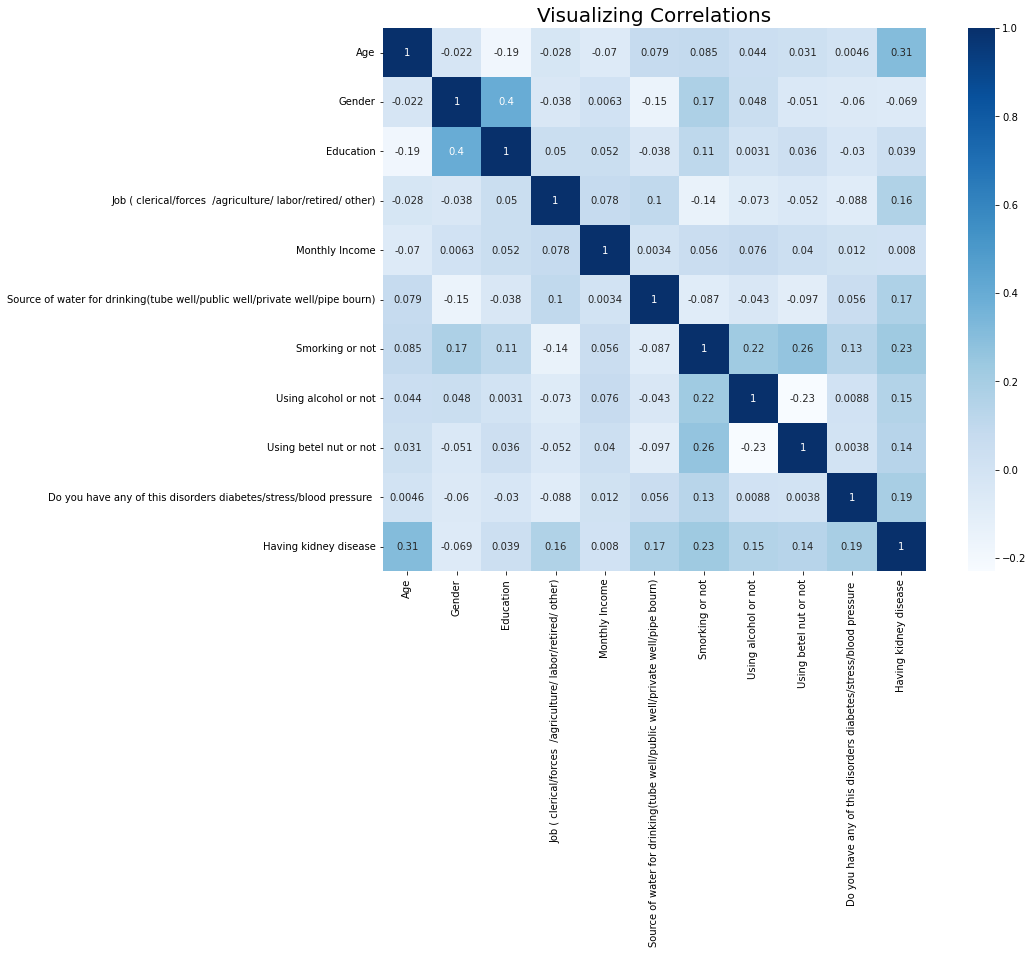

In [10]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

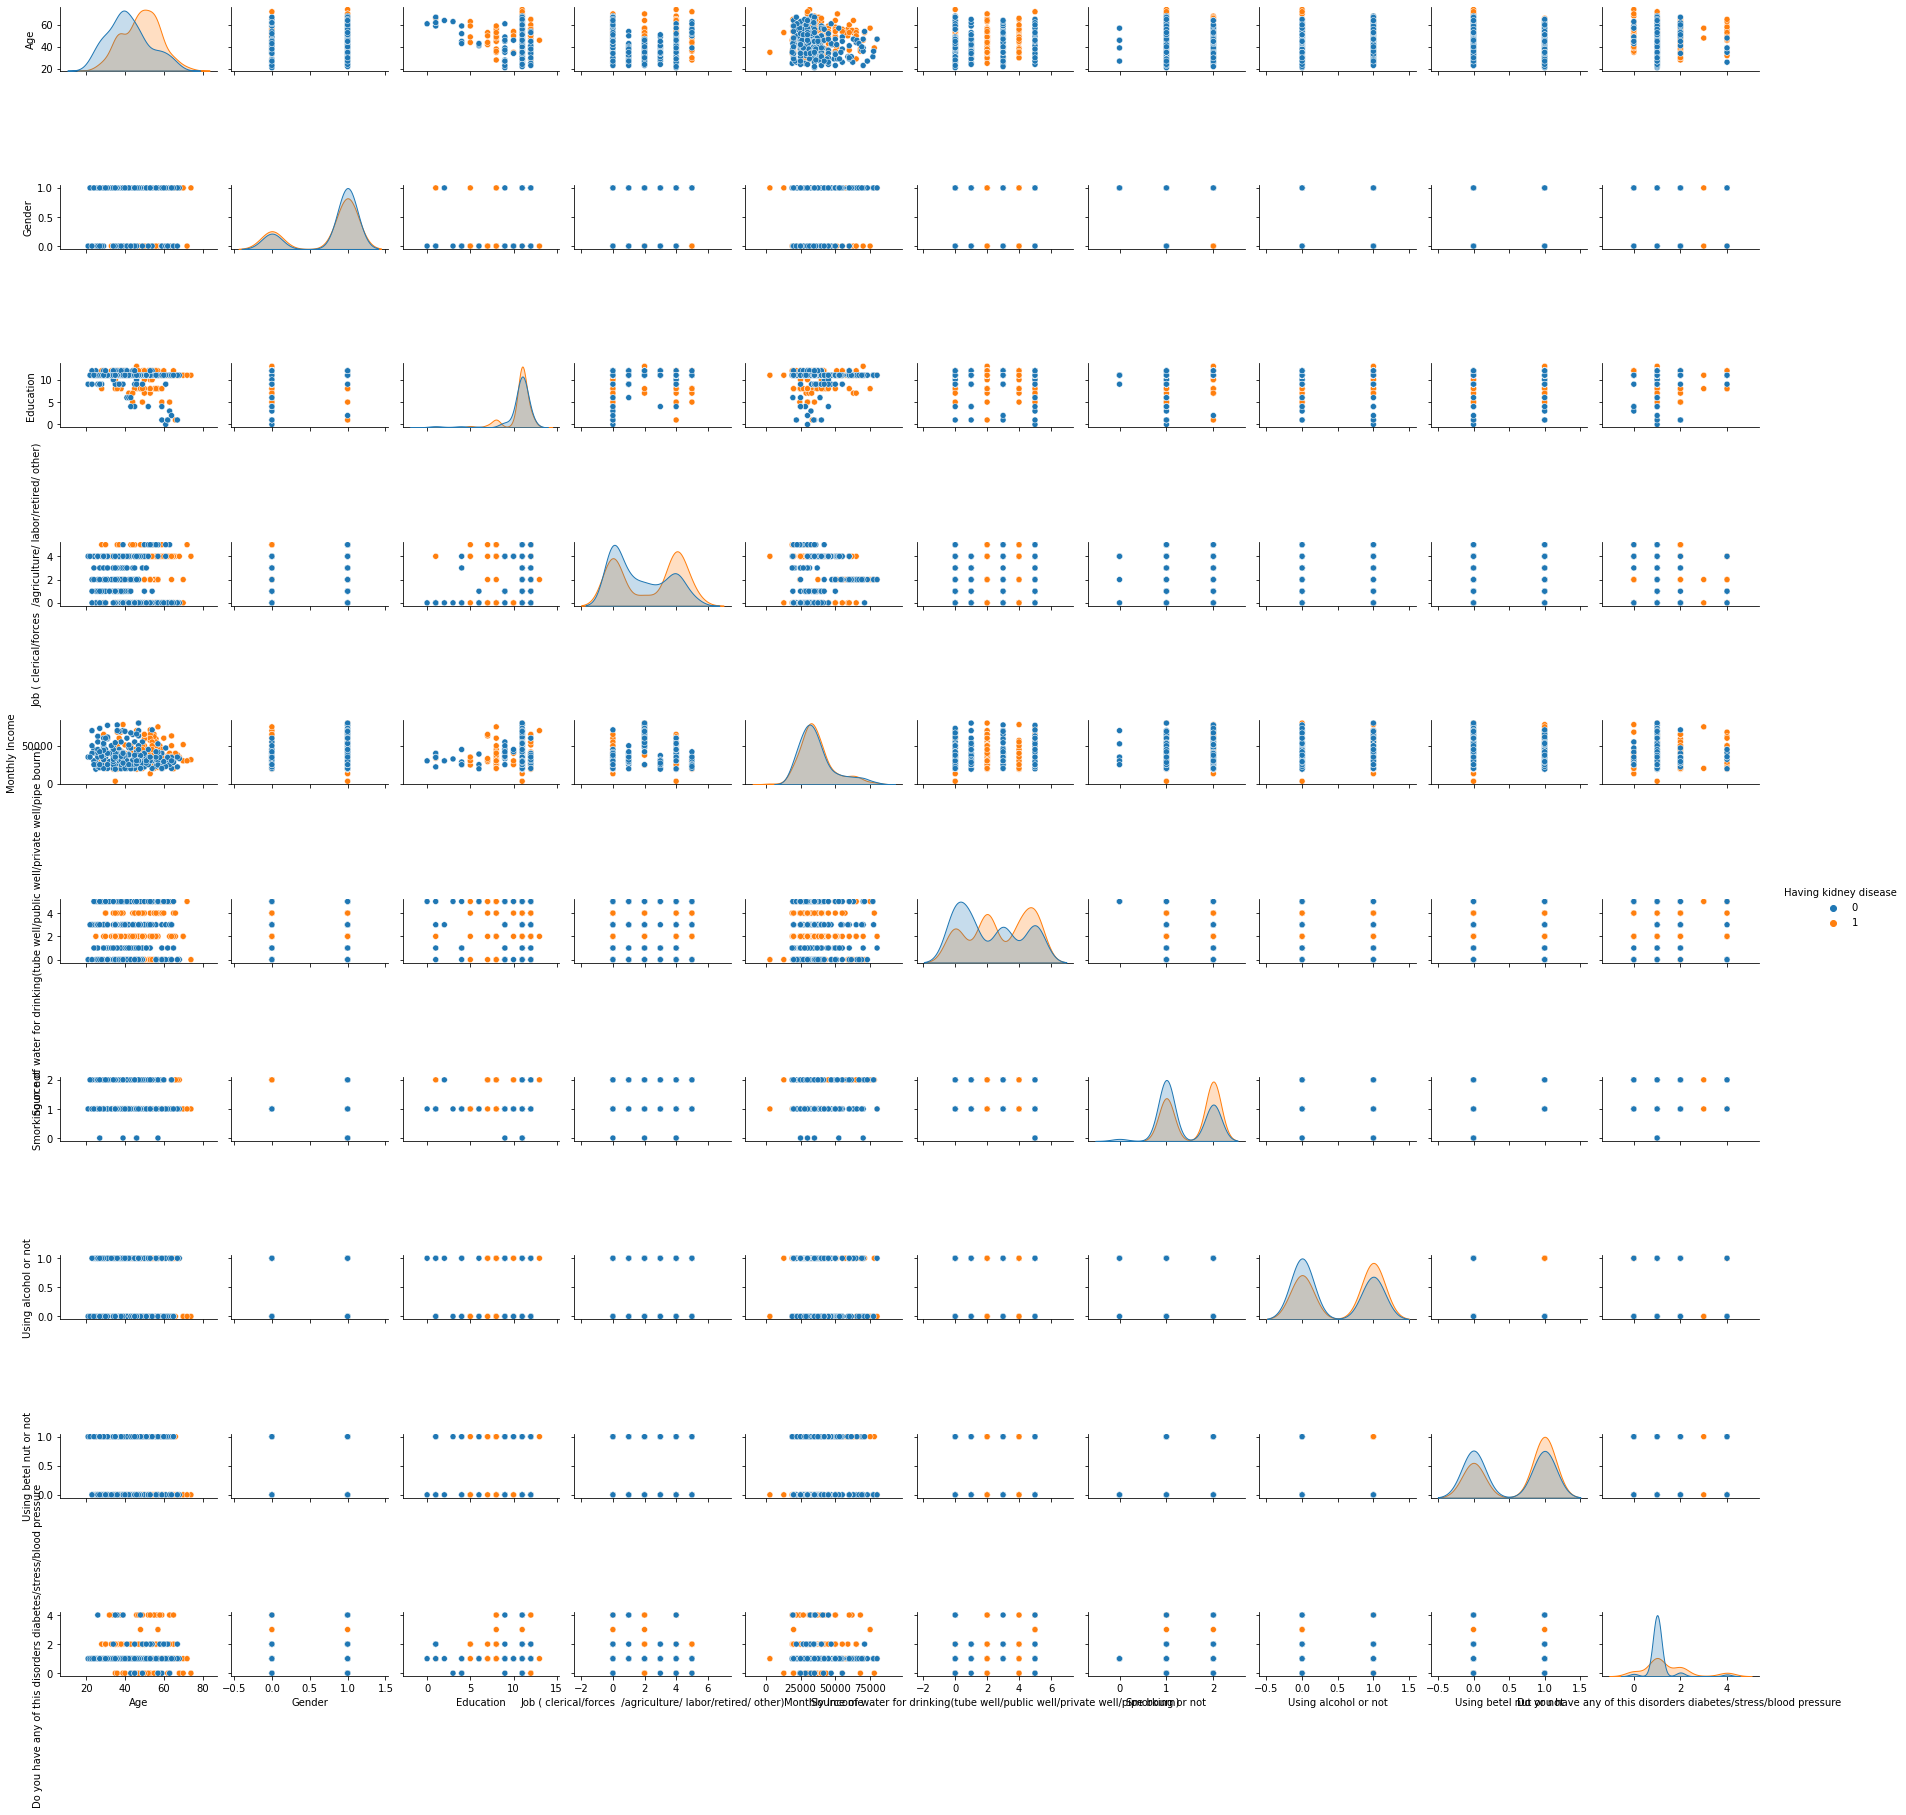

In [11]:
sns.pairplot(df,hue='Having kidney disease')

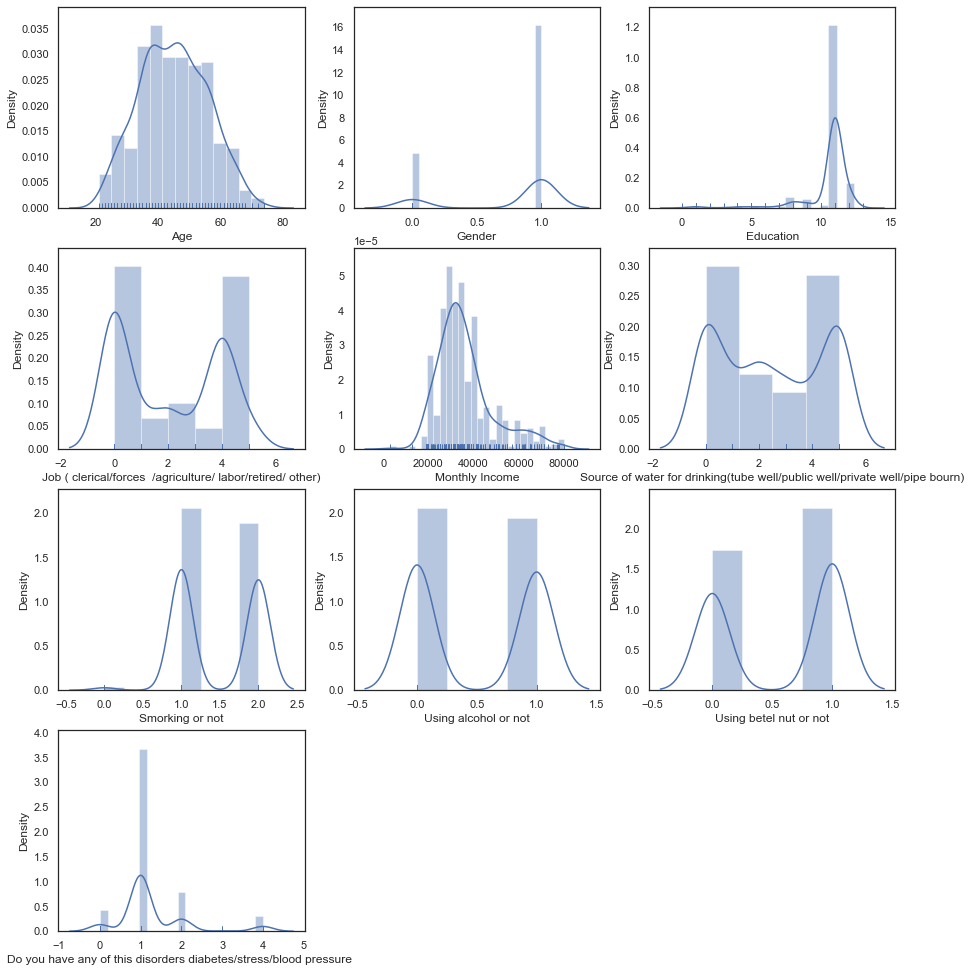

In [12]:
columns=df.columns
columns=list(columns)
columns.pop()

sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')

for i in range(len(columns)):
    plt.subplot(4,3,i+1)
    sns.distplot(df[columns[i]], hist=True, rug=True, color='b')

In [13]:
df.columns

Index(['Age', 'Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Monthly Income',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',
       'Having kidney disease'],
      dtype='object')

In [14]:
x = df[['Age', 'Gender', 'Education',
       'Job ( clerical/forces  /agriculture/ labor/retired/ other)',
       'Source of water for drinking(tube well/public well/private well/pipe bourn)',
       'Smorking or not', 'Using alcohol or not', 'Using betel nut or not',
       'Do you have any of this disorders diabetes/stress/blood pressure ',]].values


y = df['Having kidney disease'].values

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100,test_size=0.25)

In [16]:
x_train.shape
y_train.shape

(361,)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.0743801652892562

In [20]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.2727272727272727

In [21]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.9254098360655736

In [22]:
rf.score(x_test,y_test)

0.9256198347107438

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        61
           1       0.73      0.73      0.73        60

    accuracy                           0.74       121
   macro avg       0.74      0.74      0.74       121
weighted avg       0.74      0.74      0.74       121



Confusion matrix

 [[56  5]
 [11 49]]


<AxesSubplot:>

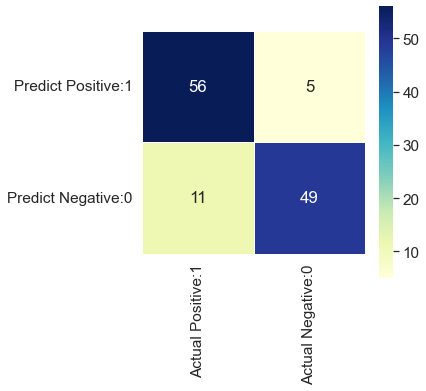

In [80]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu',square=True,  linewidths=0.5, ax=ax)

In [23]:
import xgboost as xgb
# from xgboost.xgbclassifier import XGBClassifier

In [24]:
clf= xgb.XGBClassifier(n_estimators=1000,learning_rate=0.05,use_label_encoder=False )

In [25]:
clf.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

C:\Users\ayodh\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [26]:
clf.best_iteration

173

In [27]:
clf= xgb.XGBClassifier(n_estimators = clf.best_iteration, random_state = 73,use_label_encoder=False )

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

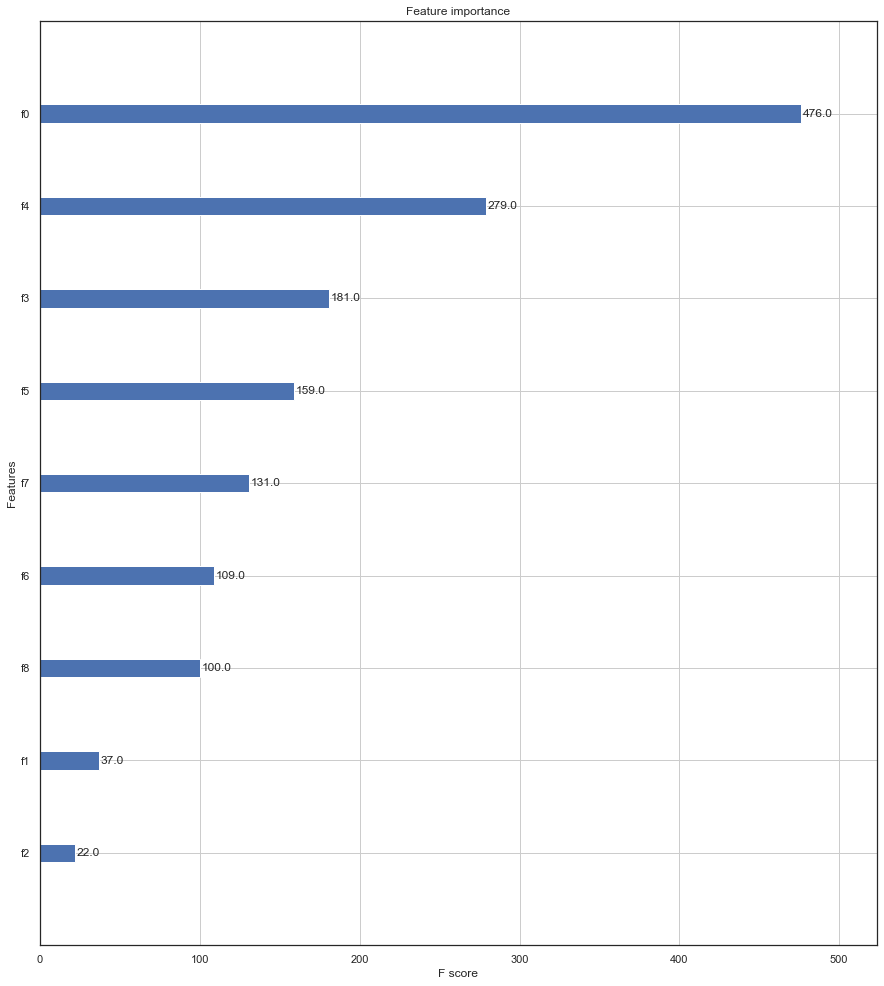

In [28]:
xgb.plot_importance(clf.fit(x_train,y_train))

# Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [76]:
# import eli5
# from eli5.sklearn import PermutationImportance

In [30]:
# x_train = pd.DataFrame(x_train, columns = x.columns)

# x_test = pd.DataFrame(x_test, columns=x.columns)

In [31]:
# perm = PermutationImportance(clf, random_state=1).fit(x_train, y_train)
# eli5.show_weights(perm, feature_names = x_train.columns.tolist())

<AxesSubplot:>

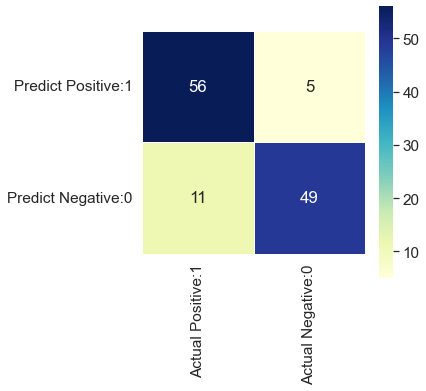

In [77]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu',square=True,  linewidths=0.5, ax=ax)

In [32]:
clf.score(x_test,y_test).round(4)

0.9504

In [33]:
df.head()


Age  Gender  Education  \
0   46       0         13   
1   66       1          1   
2   50       0         12   
3   57       1          8   
4   50       0          8   

   Job ( clerical/forces  /agriculture/ labor/retired/ other)  Monthly Income  \
0                                                  2                    70000   
1                                                  4                    33500   
2                                                  4                    37000   
3                                                  5                    24500   
4                                                  5                    25000   

   Source of water for drinking(tube well/public well/private well/pipe bourn)  \
0                                                  2                             
1                                                  2                             
2                                                  2                             
3                                                  2                             
4                                                  4                             

   Smorking or not  Using alcohol or not  Using betel nut or not  \
0                2                     1                       1   
1                2                     0                       0   
2                1                     0                       0   
3                2                     0                       0   
4                2                     1                       1   

   Do you have any of this disorders diabetes/stress/blood pressure   \
0                                                  1                   
1                                                  1                   
2                                                  1                   
3                                                  1                   
4                                                  1                   

   Having kidney disease  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

In [37]:
clf.predict([[46,0,13,2,70000,2,2,1,1]])

array([1])

In [35]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

In [36]:
model = pickle.load(open('model.pkl','rb'))
print(clf.predict([[1,1,1,1,1,1,1,1,1]]))

[0]


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [40]:
x_train = pd.DataFrame(x_train, columns=[cols])
x_test = pd.DataFrame(x_test, columns=[cols])

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 

svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8595


In [46]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [47]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8836


Parameters that give the best results : 

 {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1, gamma=0.5)


In [49]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test, y_test)))

GridSearch CV score on test set: 0.8843


<AxesSubplot:>

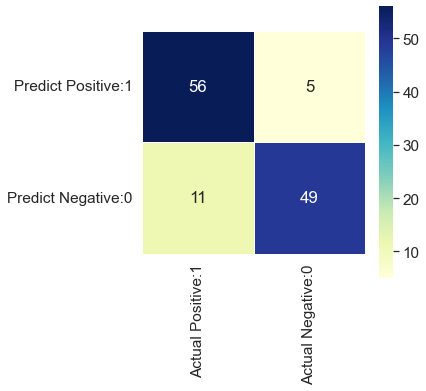

In [78]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu',square=True,  linewidths=0.5, ax=ax)